# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from glob import glob

In [4]:
import os

In [5]:
ls

CONTRIBUTING.md             README.md
LICENSE.md                  awesome.gif
Phase 1 Project Code.ipynb  zippedData/


## Loading Data
- remove any columns that seem unnecessary

In [6]:
movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
name_basics_df = pd.read_csv("zippedData/imdb.name.basics.csv.gz")
title_akas_df = pd.read_csv("zippedData/imdb.title.akas.csv.gz")
title_basics_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
title_crew_df = pd.read_csv("zippedData/imdb.title.crew.csv.gz")
title_principals = pd.read_csv("zippedData/imdb.title.principals.csv.gz")
title_ratings_df = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
movies_df = pd.read_csv("zippedData/tmdb.movies.csv.gz")
movie_budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [7]:
movie_gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [8]:
name_basics_df.columns

Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

In [9]:
title_akas_df.columns

Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')

In [10]:
title_basics_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [11]:
title_crew_df.columns

Index(['tconst', 'directors', 'writers'], dtype='object')

In [12]:
title_principals.columns

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')

In [13]:
title_ratings_df.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [14]:
movies_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [15]:
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
# Saw 'Unnamed: 0' does not provide valuable
# information and decided to drop it
movies_df.drop('Unnamed: 0', axis = 1, inplace = True)
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [17]:
movie_budgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

### Initial Data Cleaning and Preparation
- Look for NaN values and deal with accordingly

In [18]:
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [19]:
movie_gross_df.isna().sum() / len(movie_gross_df)

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [20]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [21]:
title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [22]:
title_basics_df.isna().sum() / len(title_basics_df)

tconst             0.000000
primary_title      0.000000
original_title     0.000144
start_year         0.000000
runtime_minutes    0.217176
genres             0.037005
dtype: float64

In [23]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


### 3. What are the highest domestic grossing movies?

In [25]:
# notice NaN values in domestic_gross is less than 1%
# drop these rows in the cell below
movie_gross_df.isna().sum() / len(movie_gross_df)

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [26]:
# drop all rows with NaN values in domestic_gross column
domestic_gross_df = movie_gross_df.dropna(subset = ['domestic_gross'])
domestic_gross_df.isna().sum()

title                0
studio               3
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [27]:
# sort domestic_gross values in descending order
domestic_gross_df.sort_values(by = ['domestic_gross'], ascending = False, inplace=True)

<ipython-input-27-40b140f58983>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_gross_df.sort_values(by = ['domestic_gross'], ascending = False, inplace=True)


[Text(0.5, 0, 'Domestic Gross'), Text(0, 0.5, 'Movie')]

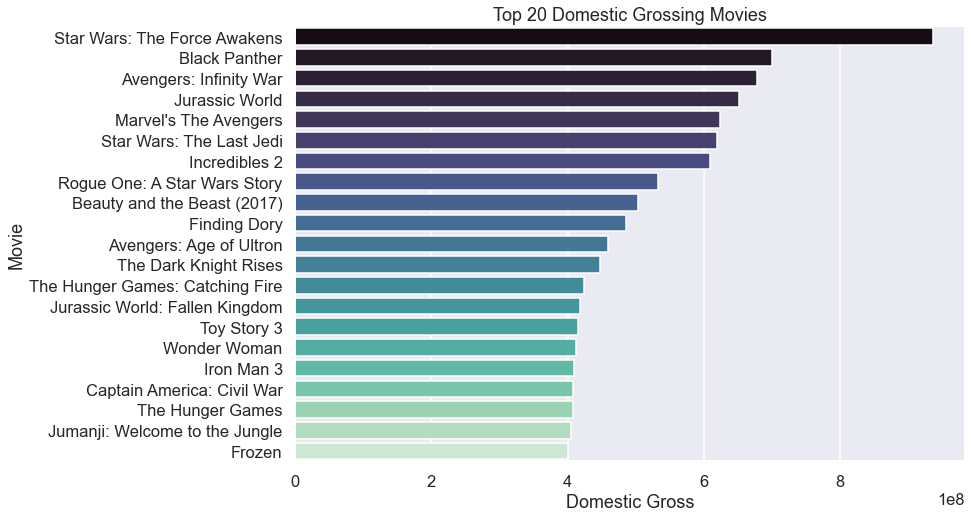

In [37]:
# barplot of top 20 highest domestic grossing movies
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Top 20 Domestic Grossing Movies')
ax = sns.barplot(x = 'domestic_gross', y = 'title', data = domestic_gross_df[0:21], palette = "mako")
ax.set(xlabel = 'Domestic Gross', ylabel = 'Movie')

### 4. What are the highest grossing studios?

In [39]:
# find grouped data for each studio
top_studios_df = domestic_gross_df.groupby(by = 'studio').sum().reset_index()

In [40]:
# sort domestic_gross descending for graph
top_studios_df.sort_values(by = ['domestic_gross'], inplace=True, ascending=False)

[Text(0.5, 0, 'Domestic Gross'), Text(0, 0.5, 'Studio')]

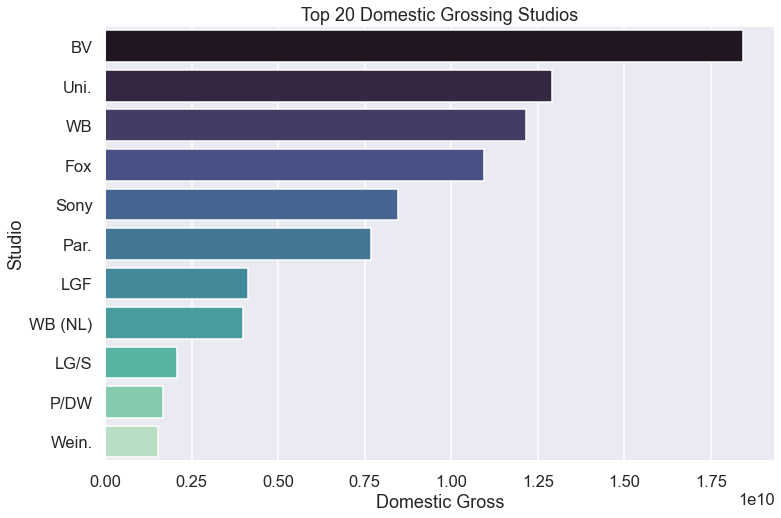

In [47]:
# barplot of top 20 highest domestic grossing movies
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Top 20 Domestic Grossing Studios')
ax = sns.barplot(x = 'domestic_gross', y = 'studio', data = top_studios_df[0:11], palette = "mako")
ax.set(xlabel = 'Domestic Gross', ylabel = 'Studio')

### 5. Most Profitable Films

In [48]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [49]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [50]:
# production_budget, domestic_gross, and worldwide_gross
# would be better suited as int 

# function that converts the dollar string into int
def convert_col_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    movie_budgets_df = convert_col_to_int(movie_budgets_df, col)

In [51]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [52]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [53]:
movie_budgets_df.isna().sum()


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [54]:
movie_budgets_df['profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [55]:
sorted_movies_by_profit = movie_budgets_df.sort_values(by = 'profit', ascending=False)


[Text(0.5, 0, 'Profit'), Text(0, 0.5, 'Movie')]

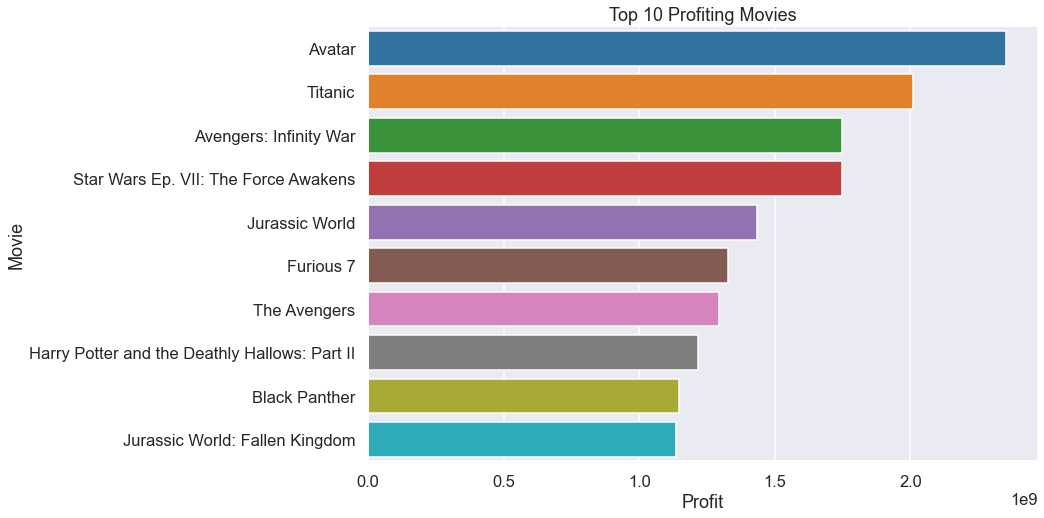

In [56]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Top 10 Profiting Movies')
ax = sns.barplot(x = 'profit', y = 'movie', data = sorted_movies_by_profit[0:10])
ax.set(xlabel = 'Profit', ylabel = 'Movie')


### 5.1 What are the most popular genres among the most profitable movies?

In [57]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [58]:
title_basics_df['primary_title'].value_counts()


Home                           24
The Return                     20
Broken                         20
Alone                          16
Homecoming                     16
                               ..
El Corazón de Bolívar           1
Kidnapped in Romania            1
Hajwala: The Missing Engine     1
Night's Drifters                1
Song of the Blind Girl          1
Name: primary_title, Length: 136071, dtype: int64

In [59]:
movie_budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [60]:
print(title_basics_df.shape)
print(movie_budgets_df.shape)

(146144, 6)
(5782, 7)


In [61]:
# left merge to get all from movie_budgets and overlapping entries
# from title basics
t_basics_m_gross_df = pd.merge(movie_budgets_df, title_basics_df, left_on = ['movie'],
                        right_on = ['primary_title'],
                        how = 'left')

In [62]:
t_basics_m_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
t_basics_m_gross_df.isna().sum() / len(t_basics_m_gross_df)

id                   0.000000
release_date         0.000000
movie                0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
profit               0.000000
tconst               0.471680
primary_title        0.471680
original_title       0.471818
start_year           0.471680
runtime_minutes      0.539122
genres               0.481651
dtype: float64

In [64]:
# profit column as no NaN values so drop all other rows with
# NaN values to prepare for graph

t_basics_m_gross_df.dropna(inplace=True)
print(t_basics_m_gross_df.isna().sum())
t_basics_m_gross_df.info()

# all columns have the same non-null count now

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit               0
tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 7219
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3309 non-null   int64  
 1   release_date       3309 non-null   object 
 2   movie              3309 non-null   object 
 3   production_budget  3309 non-null   int64  
 4   domestic_gross     3309 non-null   int64  
 5   worldwide_gross    3309 non-null   int64  
 6   profit             3309 non-null   int64  
 7   tconst             3309 non-null   object 
 8   primary_title      3309 non-null   object 
 9   original_title     3309 non-null   object 
 10  

In [65]:
t_basics_m_gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"


In [66]:
t_basics_m_gross_df.genres.unique()

array(['Horror', 'Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Thriller', 'Action,Thriller',
       'Action,Adventure,Western', 'Adventure,Animation,Comedy',
       'Adventure,Family,Fantasy', 'Adventure,Fantasy',
       'Action,Crime,Thriller', 'Action,Adventure,Comedy',
       'Action,Adventure,Drama', 'Action,Drama',
       'Action,Adventure,History', 'Family', 'Action,Adventure,Animation',
       'Documentary', 'Fantasy,Musical', 'Action,Adventure,Horror',
       'Drama,Romance', 'Comedy,Drama,Family', 'Drama,Mystery,Sci-Fi',
       'Adventure,Comedy,Family', 'Action,Adventure,Family',
       'Adventure,Drama,Family', 'Action,Horror,Sci-Fi', 'Action,Sci-Fi',
       'Animation', 'Crime,Drama', 'Biography,Documentary,History',
       'Adventure,Drama,Sci-Fi', 'Drama,Fantasy,Romance',
       'Family,Fantasy,Musical', 'Action,Drama,History', 'Sci-Fi',
       'Documentary,Drama,Sport', 'Adventure,Drama,Sport',
       'Fantasy,Romance', 'Action,Drama,Fan

In [67]:
# Genres are in a string. Need to separate into a list
t_basics_m_gross_df['genres_split'] = t_basics_m_gross_df['genres'].map(lambda x: x.split(",") if x else x)
t_basics_m_gross_df[:25]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_split
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,[Horror]
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,tt2379713,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller","[Action, Adventure, Thriller]"
10,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,809439099,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012.0,164.0,"Action,Thriller","[Action, Thriller]"
11,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,118151347,tt3778644,Solo: A Star Wars Story,Solo: A Star Wars Story,2018.0,135.0,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
12,13,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-14997885,tt1210819,The Lone Ranger,The Lone Ranger,2013.0,150.0,"Action,Adventure,Western","[Action, Adventure, Western]"


In [68]:
# Sort by top 10 profitable and view genres
profit_genres_df = t_basics_m_gross_df.sort_values(by = 'profit', ascending = False)
profit_genres_df[0:15]

# ISSUE: MOVIE TITLES ARE REPEATED. FIND A WAY TO GET RID OF REPEATS

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_split
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,[Horror]
47,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,tt8852130,Titanic,Titanic,2018.0,115.0,Family,[Family]
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
73,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,tt2820852,Furious 7,Furious Seven,2015.0,137.0,"Action,Crime,Thriller","[Action, Crime, Thriller]"
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,tt0848228,The Avengers,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
45,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,tt1825683,Black Panther,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
132,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018.0,128.0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
182,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,tt2294629,Frozen,Frozen,2013.0,102.0,"Adventure,Animation,Comedy","[Adventure, Animation, Comedy]"
180,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,tt1323045,Frozen,Frozen,2010.0,93.0,"Adventure,Drama,Sport","[Adventure, Drama, Sport]"


### 5.1 Genres among most profitable movies (attempt 2)

In [131]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017


In [132]:
# add column of just year to movie_budgets to facilitate join
movie_budgets_df['year'] = movie_budgets_df['release_date'].map(lambda x: x[-4:])

In [133]:
# change start_year in title_basics to string to facilitate join
title_basics_df['start_year'] = title_basics_df['start_year'].map(lambda x: str(x))

In [135]:
title_basics_df.dtypes

tconst              object
primary_title       object
original_title      object
start_year          object
runtime_minutes    float64
genres              object
dtype: object

In [138]:
profit_genres_df = pd.merge(title_basics_df, movie_budgets_df, left_on = ['primary_title', 'start_year'],
                           right_on = ['movie', 'year'], how = 'inner')
profit_genres_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294,2012
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,2013
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,34108587,2014
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,-23455268,2011


In [139]:
# sort by profit
sort_profit_genres_df = profit_genres_df.sort_values(by = 'profit', aascending = False)
sort_profit_genres_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015
1110,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015
82,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012
731,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018


In [243]:
# look at top 500
top_profit_genre_df = sort_profit_genres_df.head(500)

In [258]:
top_profit_genre_df['genres'][409:410].isna()

147    True
Name: genres, dtype: bool

In [260]:
# IF USING top 500
top_profit_genre_df = top_profit_genre_df.drop([147])

In [261]:
top_profit_genre_df['genres_split'] = top_profit_genre_df['genres'].map(lambda x: x.split(",") if x else x)
top_profit_genre_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,genres_split
1336,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,"[Action, Adventure, Sci-Fi]"
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,"[Action, Adventure, Sci-Fi]"
1110,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,"[Action, Crime, Thriller]"
82,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012,"[Action, Adventure, Sci-Fi]"
731,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,"[Action, Adventure, Sci-Fi]"


In [262]:
# make dictionary with all genres and counts
genre_dict = {}
for genre_list in top_profit_genre_df['genres_split']:
    for genre in genre_list:
        if genre in genre_dict.keys():
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 0
genre_dict
            

{'Action': 207,
 'Adventure': 213,
 'Sci-Fi': 75,
 'Crime': 48,
 'Thriller': 84,
 'Animation': 71,
 'Comedy': 186,
 'Family': 34,
 'Fantasy': 50,
 'Musical': 2,
 'Biography': 33,
 'Drama': 157,
 'Music': 10,
 'Horror': 46,
 'Romance': 47,
 'Mystery': 40,
 'Western': 2,
 'History': 12,
 'Documentary': 6,
 'War': 3,
 'Sport': 3}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

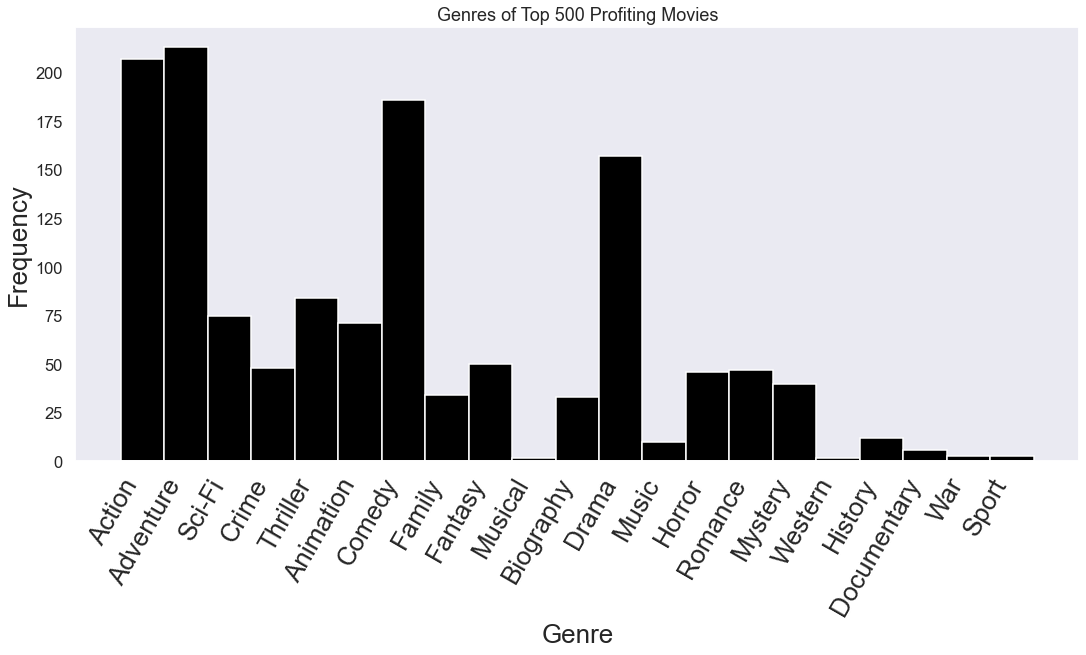

In [264]:
# plot
sns.set_style("dark")
sns.set_context("talk")
fig = plt.figure(figsize = (18, 8))
plt.title('Genres of Top 500 Profiting Movies')
#ax = sns.distplot(data = genre_dict[0:15])
width = 1.0
plt.bar(genre_dict.keys(), genre_dict.values(), width, color='black')
#ax.set(xlabel = 'Average Rating', ylabel = 'Movie')
plt.xlabel('Genre', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.xticks(
    rotation=60,
    fontweight='light',
    horizontalalignment='right',
    fontsize='x-large'  
)

In [148]:
# let's see same plot as above but for Top 100 ROI
profit_genres_df['ROI'] = (profit_genres_df['profit'] / profit_genres_df['production_budget']) * 100
profit_genres_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294,2012,-99.836209
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,2013,106.440860
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,34108587,2014,121.816382
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,666.909239
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,-23455268,2011,-52.122818


In [265]:
sort_roi_genres_df = profit_genres_df.sort_values(by = 'ROI', ascending = False)
top_roi_genres_df = sort_roi_genres_df.head(500)
top_roi_genres_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,ROI
969,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,2015,41556.474000
502,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,2012,10075.949000
485,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,2010,5817.067733
1431,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,250367951,2017,5007.359020
1423,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,63745512,2016,4249.700800


In [266]:
top_roi_genres_df['genres'][32:34]

795    Horror,Mystery,Thriller
796                        NaN
Name: genres, dtype: object

In [267]:
top_roi_genres_df = top_roi_genres_df.drop([796])

In [268]:
top_roi_genres_df['genres'].isna().sum()

0

In [269]:
top_roi_genres_df['genres_split'] = top_roi_genres_df['genres'].map(lambda x: x.split(",") if x else x)
top_roi_genres_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,ROI,genres_split
969,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,2015,41556.474000,"[Horror, Mystery, Thriller]"
502,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,2012,10075.949000,[Horror]
485,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,2010,5817.067733,[Horror]
1431,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,250367951,2017,5007.359020,"[Horror, Mystery, Thriller]"
1423,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,63745512,2016,4249.700800,[Drama]


In [270]:
# get a dictionary of counts of genres for each movie
roi_genre_dict = {}
for genre_list in top_roi_genres_df['genres_split']:
    for genre in genre_list:
        if genre in roi_genre_dict.keys():
            roi_genre_dict[genre] += 1
        else:
            roi_genre_dict[genre] = 0
roi_genre_dict

{'Horror': 77,
 'Mystery': 63,
 'Thriller': 99,
 'Drama': 220,
 'Action': 132,
 'Biography': 46,
 'Documentary': 11,
 'Fantasy': 38,
 'Romance': 67,
 'Comedy': 175,
 'Music': 17,
 'Sci-Fi': 58,
 'Crime': 49,
 'Adventure': 135,
 'Animation': 44,
 'Family': 23,
 'Sport': 4,
 'History': 13,
 'Musical': 3,
 'Western': 1,
 'War': 1}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

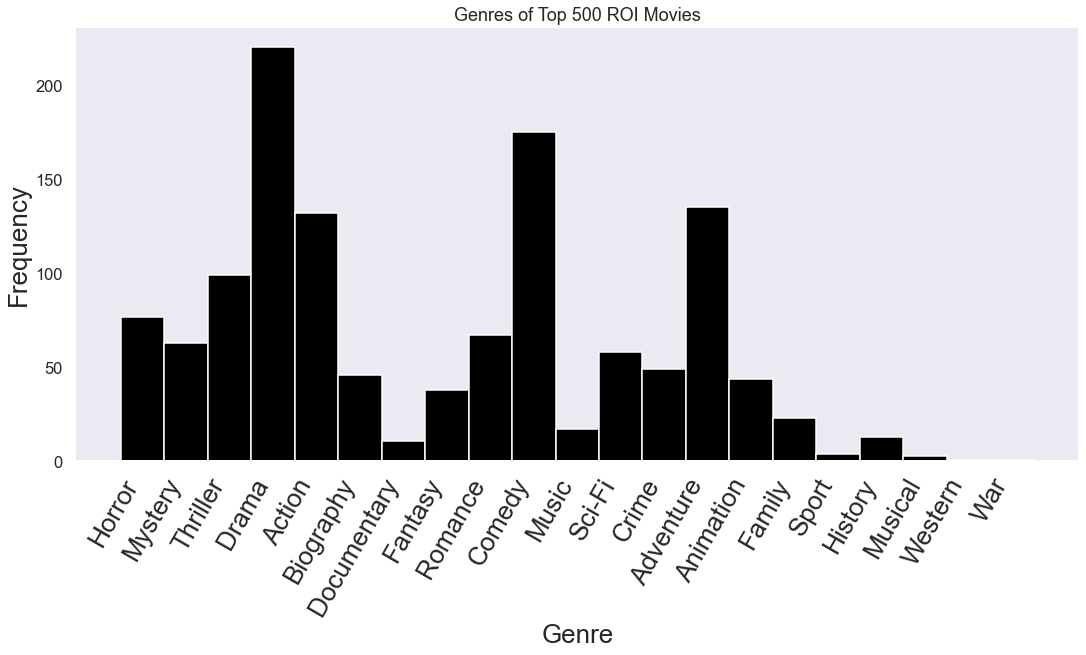

In [271]:
# plot
sns.set_style("dark")
sns.set_context("talk")
fig = plt.figure(figsize = (18, 8))
plt.title('Genres of Top 500 ROI Movies')
#ax = sns.distplot(data = genre_dict[0:15])
width = 1.0
plt.bar(roi_genre_dict.keys(), roi_genre_dict.values(), width, color='black')
#ax.set(xlabel = 'Average Rating', ylabel = 'Movie')
plt.xlabel('Genre', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.xticks(
    rotation=60,
    fontweight='light',
    horizontalalignment='right',
    fontsize='x-large'  
)

### 6. What are the highest rated movies?
possible branches:
- correlation between avg rating and num votes
- average rating and genre or num votes and genre relationship

In [69]:
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [70]:
print(title_basics_df.shape)
print(title_ratings_df.shape)

(146144, 6)
(73856, 3)


In [71]:
# movies are unidentifyable by tconst so merge with title_basics
t_ratings_t_basics_df = pd.merge(title_ratings_df, title_basics_df, on = ['tconst'],
                        how = 'left')

In [72]:
print(t_ratings_t_basics_df.shape)
t_ratings_t_basics_df.head()

(73856, 8)


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


### 6.1 Find the highest rated movies and the number of votes for each

In [73]:
# first sort by average rating
sorted_movies_by_avg_rating = t_ratings_t_basics_df.sort_values(by = 'averagerating'
                                                                , ascending = False)
sorted_movies_by_avg_rating.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
27644,tt8730716,10.0,5,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
8992,tt1770682,10.0,5,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
26153,tt2632430,10.0,5,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
65033,tt9715646,10.0,20,Renegade,Renegade,2019,NaN,Documentary
57679,tt5344358,10.0,6,All Around Us,All Around Us,2019,NaN,Documentary


[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Movie')]

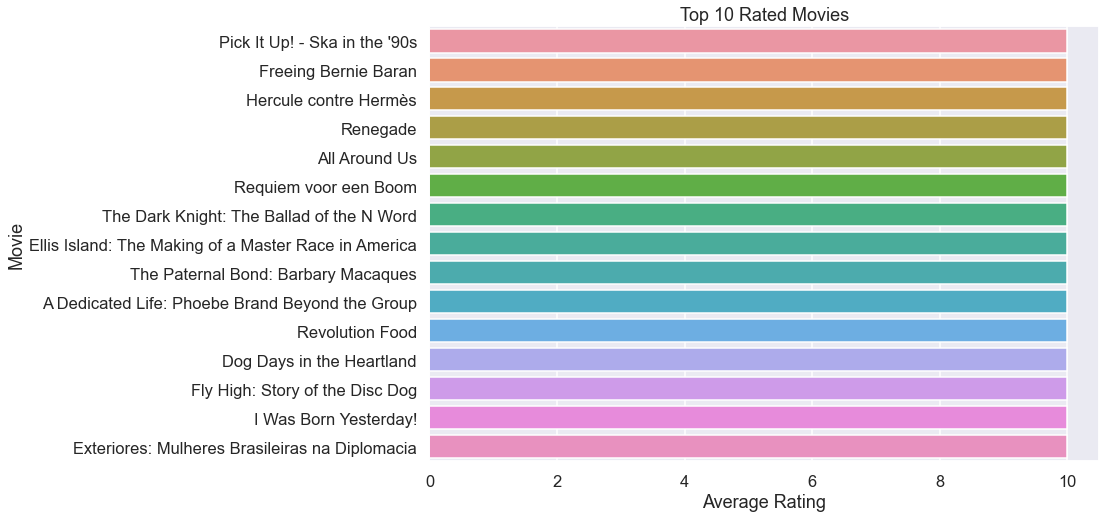

In [74]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Top 10 Rated Movies')
ax = sns.barplot(x = 'averagerating', y = 'primary_title', data = 
                 sorted_movies_by_avg_rating[0:15])

ax.set(xlabel = 'Average Rating', ylabel = 'Movie')

[Text(0.5, 0, 'Number of Votes'), Text(0, 0.5, 'Movie')]

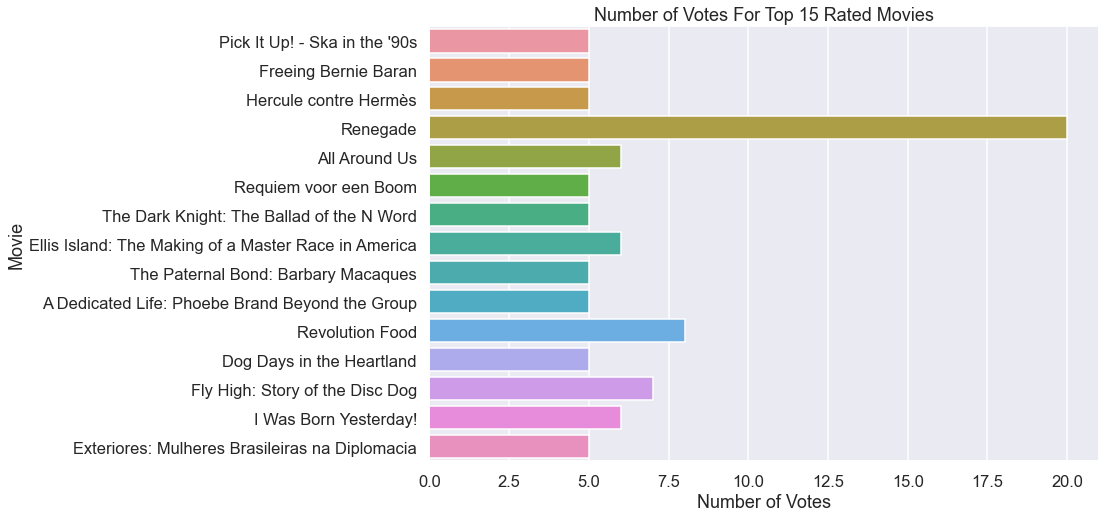

In [75]:
# plot number of votes for each of the above movies

sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Number of Votes For Top 15 Rated Movies')
ax = sns.barplot(x = 'numvotes', y = 'primary_title', data = 
                 sorted_movies_by_avg_rating[0:15])

ax.set(xlabel = 'Number of Votes', ylabel = 'Movie')

### 6.2 Find the movies with most votes and find the ratings for each (Reverse of 6.1)

In [76]:
# Sort by number of votes
sorted_movies_by_num_votes = t_ratings_t_basics_df.sort_values(by = 'numvotes',
                                                                 ascending = False)
sorted_movies_by_num_votes.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
8738,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
48221,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"


[Text(0.5, 0, 'Number of Votes'), Text(0, 0.5, 'Movie')]

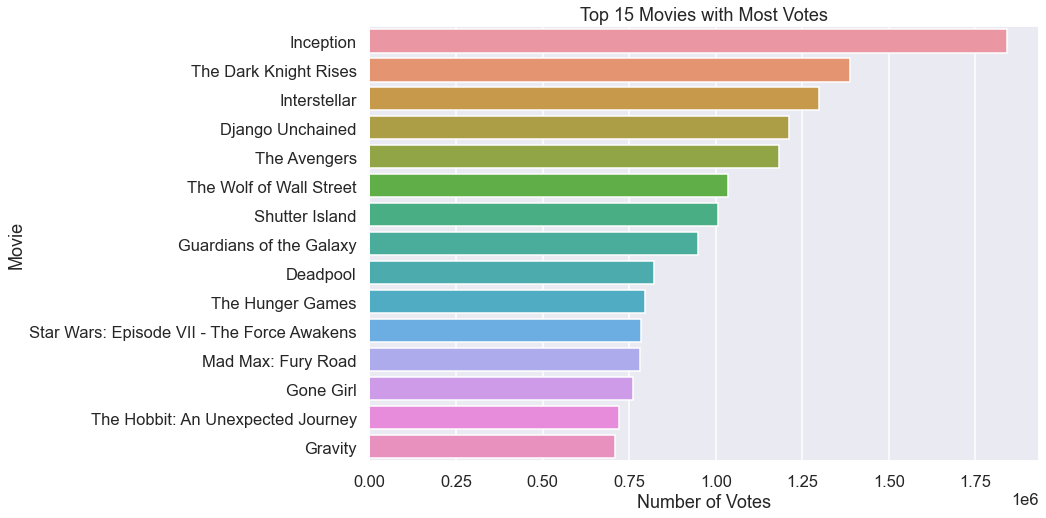

In [77]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Top 15 Movies with Most Votes')
ax = sns.barplot(x = 'numvotes', y = 'primary_title', data = 
                 sorted_movies_by_num_votes[0:15])

ax.set(xlabel = 'Number of Votes', ylabel = 'Movie')

[Text(0.5, 0, 'Average Rating'), Text(0, 0.5, 'Movie')]

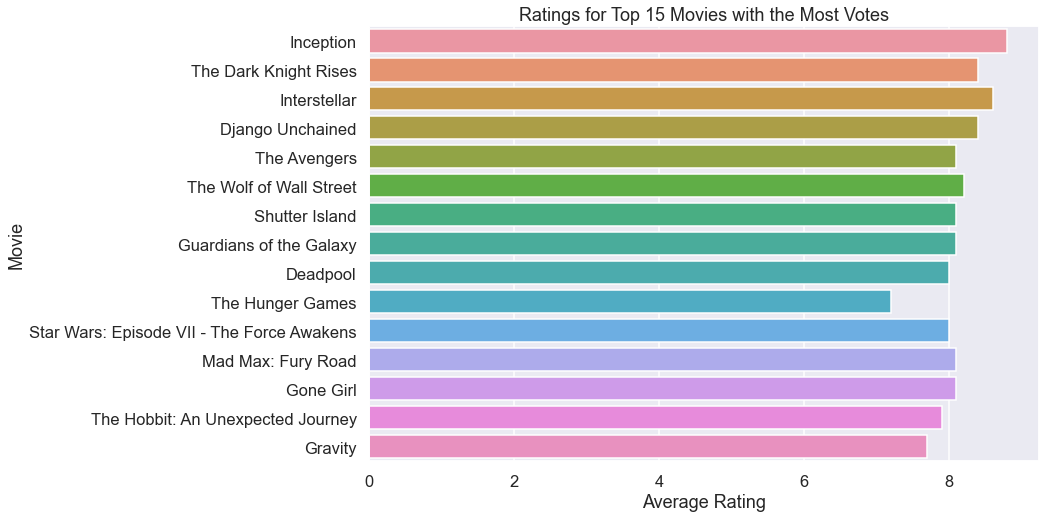

In [78]:
# plot ratings for each of these movies
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Ratings for Top 15 Movies with the Most Votes')
ax = sns.barplot(x = 'averagerating', y = 'primary_title', data = 
                 sorted_movies_by_num_votes[0:15])

ax.set(xlabel = 'Average Rating', ylabel = 'Movie')

### 6.3 Is there a way to combine averagerating and numvotes into one variable?
Methodology:
1. standardize both averagerating and numvotes (subtract mean and divide std dev)
2. add standardized variables together to create a new variable

In [79]:
# find mean and standard deviation for averagerating and numvotes
avg_rating_mean = t_ratings_t_basics_df['averagerating'].mean()
avg_rating_stddev = t_ratings_t_basics_df['averagerating'].std()
numvotes_mean = t_ratings_t_basics_df['numvotes'].mean()
numvotes_stddev = t_ratings_t_basics_df['numvotes'].std()
numvotes_mean

3523.6621669194105

In [80]:
# standardize each by subtracting mean and dividing std dev
# new variable will be the sum of the standardized ones
t_ratings_t_basics_df['std_averagerating'] = t_ratings_t_basics_df['averagerating'].map(
                                            lambda x: (x-avg_rating_mean) / avg_rating_stddev)
t_ratings_t_basics_df['std_numvotes'] = t_ratings_t_basics_df['numvotes'].map(
                                            lambda x: (x-numvotes_mean) / numvotes_stddev)
t_ratings_t_basics_df['std_avgrating_numvotes'] = (t_ratings_t_basics_df['std_averagerating'] +
                                                  t_ratings_t_basics_df['std_numvotes'])
t_ratings_t_basics_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,std_averagerating,std_numvotes,std_avgrating_numvotes
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,1.333763,-0.115292,1.218471
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,1.740549,-0.097863,1.642686
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,0.045608,-0.115655,-0.070047
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",-1.445939,1.545795,0.099856
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",0.113406,-0.115622,-0.002216


In [81]:
# Sort by standardized variable
sorted_movies_by_standardized = t_ratings_t_basics_df.sort_values(by = 'std_avgrating_numvotes',
                                                                  ascending = False)
sorted_movies_by_standardized.head(10)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,std_averagerating,std_numvotes,std_avgrating_numvotes
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",1.672751,60.656927,62.329678
8738,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",1.401561,45.693678,47.095239
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",1.537156,42.774456,44.311611
38058,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",1.401561,39.871936,41.273496
48221,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",1.198168,38.955913,40.154081
39356,tt0993846,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",1.265965,34.060657,35.326623
3140,tt1130884,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",1.198168,33.090235,34.288403
25777,tt2015381,8.1,948394,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",1.198168,31.189992,32.388160
60518,tt1431045,8.0,820847,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",1.130370,26.979690,28.110060
36852,tt2488496,8.0,784780,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy",1.130370,25.789125,26.919495


[Text(0.5, 0, 'Standardized Value'), Text(0, 0.5, 'Movie')]

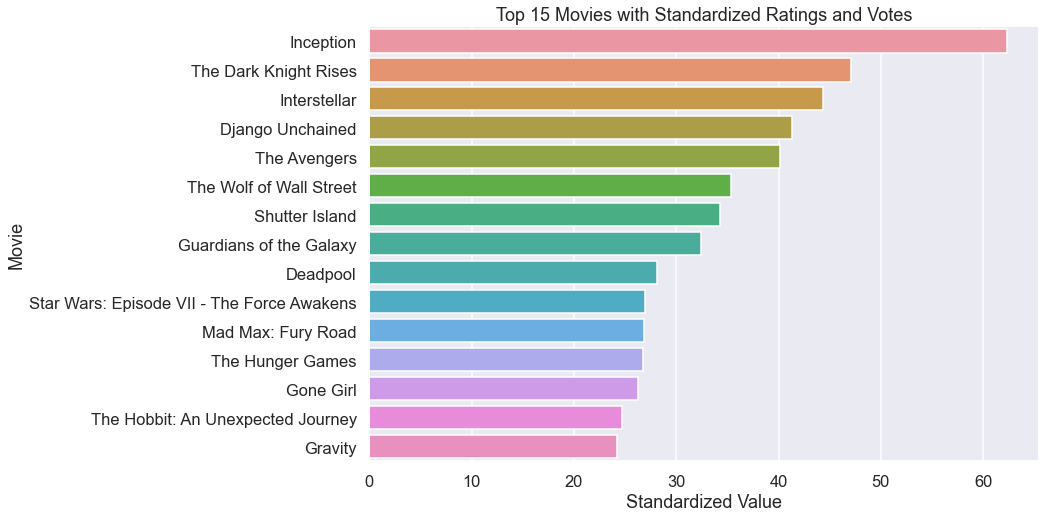

In [82]:
# plot ratings for each of these movies
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Top 15 Movies with Standardized Ratings and Votes')
ax = sns.barplot(x = 'std_avgrating_numvotes', y = 'primary_title', data = 
                 sorted_movies_by_standardized[0:15])

ax.set(xlabel = 'Standardized Value', ylabel = 'Movie')

### 6.4 Correlations between Average Rating and Number of Votes, and Profit

In [83]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [84]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [85]:
movie_budgets_df['movie'].value_counts()

Halloween                 3
Home                      3
King Kong                 3
Beauty and the Beast      2
The Love Letter           2
                         ..
No Country for Old Men    1
Straight A's              1
Rumor Has It              1
Here Comes the Boom       1
The Perfect Guy           1
Name: movie, Length: 5698, dtype: int64

In [107]:
movie_budgets_df['release_date'][0][-4:]

'2009'

In [108]:
movie_budgets_df['year'] = movie_budgets_df['release_date'].map(lambda x: x[-4:])


In [109]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017


In [86]:
t_ratings_t_basics_df.head()


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,std_averagerating,std_numvotes,std_avgrating_numvotes
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,1.333763,-0.115292,1.218471
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,1.740549,-0.097863,1.642686
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,0.045608,-0.115655,-0.070047
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",-1.445939,1.545795,0.099856
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",0.113406,-0.115622,-0.002216


In [91]:
t_ratings_t_basics_df['primary_title'].value_counts()


The Return                11
Broken                    10
Together                   9
Lucky                      9
Homecoming                 9
                          ..
Anandi Gopal               1
Love is Potatoes           1
Doppelgänger               1
The Babymakers             1
Song of the Blind Girl     1
Name: primary_title, Length: 69993, dtype: int64

In [96]:
t_ratings_t_basics_df.loc[t_ratings_t_basics_df['primary_title'] == 'Frozen']


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,std_averagerating,std_numvotes,std_avgrating_numvotes
17287,tt1323045,6.2,62311,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",-0.089987,1.940559,1.850572
19784,tt1611845,5.4,75,Frozen,Wai nei chung ching,2010,92.0,"Fantasy,Romance",-0.632368,-0.113840,-0.746207
61117,tt2294629,7.5,516998,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",0.791382,16.949691,17.741073


In [115]:

t_ratings_t_basics_df['start_year'] = t_ratings_t_basics_df['start_year'].map(lambda x: str(x))


In [116]:
t_ratings_t_basics_df.dtypes

tconst                     object
averagerating             float64
numvotes                    int64
primary_title              object
original_title             object
start_year                 object
runtime_minutes           float64
genres                     object
std_averagerating         float64
std_numvotes              float64
std_avgrating_numvotes    float64
dtype: object

In [121]:
ratings_votes_profit_corr_df = pd.merge(t_ratings_t_basics_df, movie_budgets_df, left_on = 
                                        ['primary_title', 'start_year'], right_on = 
                                        ['movie', 'year'], how = 'inner')
ratings_votes_profit_corr_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,std_averagerating,std_numvotes,std_avgrating_numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",-1.445939,1.545795,0.099856,42,"Jan 10, 2014",The Legend of Hercules,70000000,18848538,58953319,-11046681,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,-0.835760,0.157534,-0.678226,38,"Sep 27, 2013",Baggage Claim,8500000,21569509,22885836,14385836,2013
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",0.859180,10.666571,11.525750,15,"Sep 23, 2011",Moneyball,50000000,75605492,111300835,61300835,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",0.113406,2.765045,2.878451,61,"Oct 15, 2010",Hereafter,50000000,32746941,108660270,58660270,2010
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",0.587989,15.654815,16.242805,44,"Mar 16, 2012",21 Jump Street,42000000,138447667,202812429,160812429,2012


In [127]:
ratings_votes_profit_corr_df['numvotes'].corr(ratings_votes_profit_corr_df['profit'])

0.6297368005750976

[Text(0.5, 0, 'Number of Votes '), Text(0, 0.5, 'Profit')]

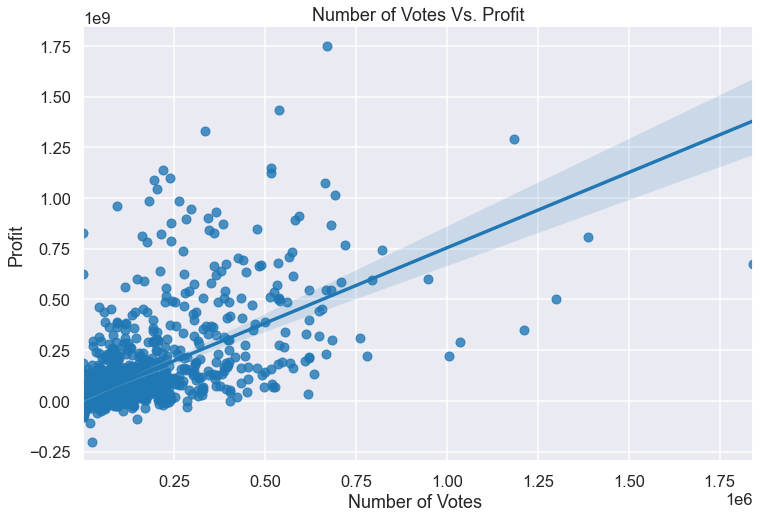

In [130]:
sns.set_style("darkgrid")
sns.set_context("talk")
fig = plt.figure(figsize = (12, 8))
plt.title('Number of Votes Vs. Profit')
ax = sns.regplot(x = 'numvotes', y = 'profit', data = 
                 ratings_votes_profit_corr_df, fit_reg=True, scatter=True)

ax.set(xlabel = 'Number of Votes ', ylabel = 'Profit')

### 7. Most Popular Movies

In [196]:
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [200]:
movies_df.sort_values(by = 'vote_count',ascending = False).head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
17383,"[28, 12, 35]",293660,en,Deadpool,35.067,2016-02-12,Deadpool,7.6,20175
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
5189,"[18, 37]",68718,en,Django Unchained,21.260,2012-12-25,Django Unchained,8.0,15725
5235,"[878, 12, 14]",70160,en,The Hunger Games,14.212,2012-03-23,The Hunger Games,7.1,14587
14177,"[28, 12, 878]",76341,en,Mad Max: Fury Road,28.099,2015-05-15,Mad Max: Fury Road,7.4,14454
7881,"[28, 12, 878]",68721,en,Iron Man 3,32.093,2013-05-03,Iron Man 3,6.9,14155


## What is the goal with the movie?
- Focus on return on investment
- Focus on views and media attention

## What movie genres are best to achieve the respective goal?

## What should the budget be?

## When should the movie be released?